<a href="https://colab.research.google.com/github/notArnab/Sign_Language_Detection/blob/main/IndianHandSignDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: isl_data_grey_split/train/u/148.png  
  inflating: isl_data_grey_split/train/u/149.png  
  inflating: isl_data_grey_split/train/u/152.png  
  inflating: isl_data_grey_split/train/u/153.png  
  inflating: isl_data_grey_split/train/u/154.png  
  inflating: isl_data_grey_split/train/u/156.png  
  inflating: isl_data_grey_split/train/u/157.png  
  inflating: isl_data_grey_split/train/u/158.png  
  inflating: isl_data_grey_split/train/u/159.png  
  inflating: isl_data_grey_split/train/u/16.png  
  inflating: isl_data_grey_split/train/u/160.png  
  inflating: isl_data_grey_split/train/u/161.png  
  inflating: isl_data_grey_split/train/u/163.png  
  inflating: isl_data_grey_split/train/u/164.png  
  inflating: isl_data_grey_split/train/u/166.png  
  inflating: isl_data_grey_split/train/u/167.png  
  inflating: isl_data_grey_split/train/u/168.png  
  inflating: isl_data_grey_split/train/u/169.png  
  inflating: isl_data_grey_split

In [10]:
import pandas as pd
import PIL
import os
import numpy as np
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from IPython.display import display, Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

In [3]:
project_name = 'Indian_Hand_Sign_Detection'

# List of models
model_names = [
    'VGG16_Transfer_Learning',
    'ResNet50_Transfer_Learning'
]


base_dir = '/content/isl_data_grey_split'

# Create the project directory
project_dir = os.path.join(base_dir, project_name)
os.makedirs(project_dir, exist_ok=True)

# Create a subdirectory for each model
for each_model in model_names:
    model_dir = os.path.join(project_dir, each_model)
    os.makedirs(model_dir, exist_ok=True)


print(f'Project directory structure created at: {project_dir}')

Project directory structure created at: /content/isl_data_grey_split/Indian_Hand_Sign_Detection


In [4]:
# Initialize dictionaries to hold the counts
counts = {
    'train': {},
    'test': {}
}

# Function to count images in each subdirectory
def count_images_in_directory(directory):
    label_counts = {}
    total_count = 0
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            image_count = len([file for file in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, file))])
            label_counts[label] = image_count
            total_count += image_count
    return label_counts, total_count

# Count images in train, test, and validation directories
for folder in ['train', 'test']:
    folder_path = os.path.join(base_dir, folder)
    counts[folder]['label_counts'], counts[folder]['total_count'] = count_images_in_directory(folder_path)

# Print the results
for folder in ['train', 'test']:
    print(f"Folder: {folder}")
    print(f"Total images: {counts[folder]['total_count']}")
    print("Images per label:")
    for label, count in counts[folder]['label_counts'].items():
        print(f"  {label}: {count}")
    print()

Folder: train
Total images: 19483
Images per label:
  q: 240
  m: 240
  p: 240
  a: 240
  j: 960
  y: 960
  b: 720
  n: 240
  r: 240
  t: 960
  i: 960
  o: 240
  d: 960
  l: 960
  0: 523
  f: 240
  2: 240
  h: 960
  4: 240
  7: 240
  v: 960
  9: 240
  3: 240
  s: 960
  u: 240
  z: 960
  x: 960
  6: 240
  g: 960
  w: 960
  1: 240
  5: 240
  8: 240
  k: 960
  e: 240
  c: 240

Folder: test
Total images: 4872
Images per label:
  q: 60
  m: 60
  p: 60
  a: 60
  j: 240
  y: 240
  b: 181
  n: 60
  r: 60
  t: 240
  i: 240
  o: 60
  d: 240
  l: 240
  0: 131
  f: 60
  2: 60
  h: 240
  4: 60
  7: 60
  v: 240
  9: 60
  3: 60
  s: 240
  u: 60
  z: 240
  x: 240
  6: 60
  g: 240
  w: 240
  1: 60
  5: 60
  8: 60
  k: 240
  e: 60
  c: 60



In [5]:
def count_files_in_subdirs(directory, set_name):
    # Initializing an empty dictionary to hold the count of files for each subdirectory.
    counts = {}

    # Iterating over each item in the given directory.
    for item in os.listdir(directory):
        # Construct the full path to the item.
        item_path = os.path.join(directory, item)

        # Checking if the item is a directory.
        if os.path.isdir(item_path):
            # Count the number of files in the subdirectory and add it to the dictionary.
            counts[item] = len(os.listdir(item_path))

    # Convert the counts dictionary to a DataFrame for easy viewing and analysis.
    # The index of the DataFrame is set to the provided set name.
    df = pd.DataFrame(counts, index=[set_name])
    return df

# Paths to the training and testing directories.
train_dir = '/content/isl_data_grey_split/train'
test_dir = '/content/isl_data_grey_split/test'

# Count the files in the subdirectories of the training directory and print the result.
train_count = count_files_in_subdirs(train_dir, 'train')
print(train_count)

# Count the files in the subdirectories of the testing directory and print the result.
test_count = count_files_in_subdirs(test_dir, 'test')
print(test_count)


         q    m    p    a    j    y    b    n    r    t  ...    x    6    g  \
train  240  240  240  240  960  960  720  240  240  960  ...  960  240  960   

         w    1    5    8    k    e    c  
train  960  240  240  240  960  240  240  

[1 rows x 36 columns]
       q   m   p   a    j    y    b   n   r    t  ...    x   6    g    w   1  \
test  60  60  60  60  240  240  181  60  60  240  ...  240  60  240  240  60   

       5   8    k   e   c  
test  60  60  240  60  60  

[1 rows x 36 columns]


<Axes: >

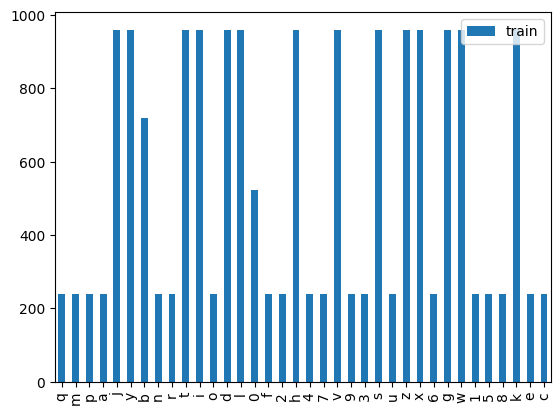

In [6]:
train_count.transpose().plot(kind='bar')

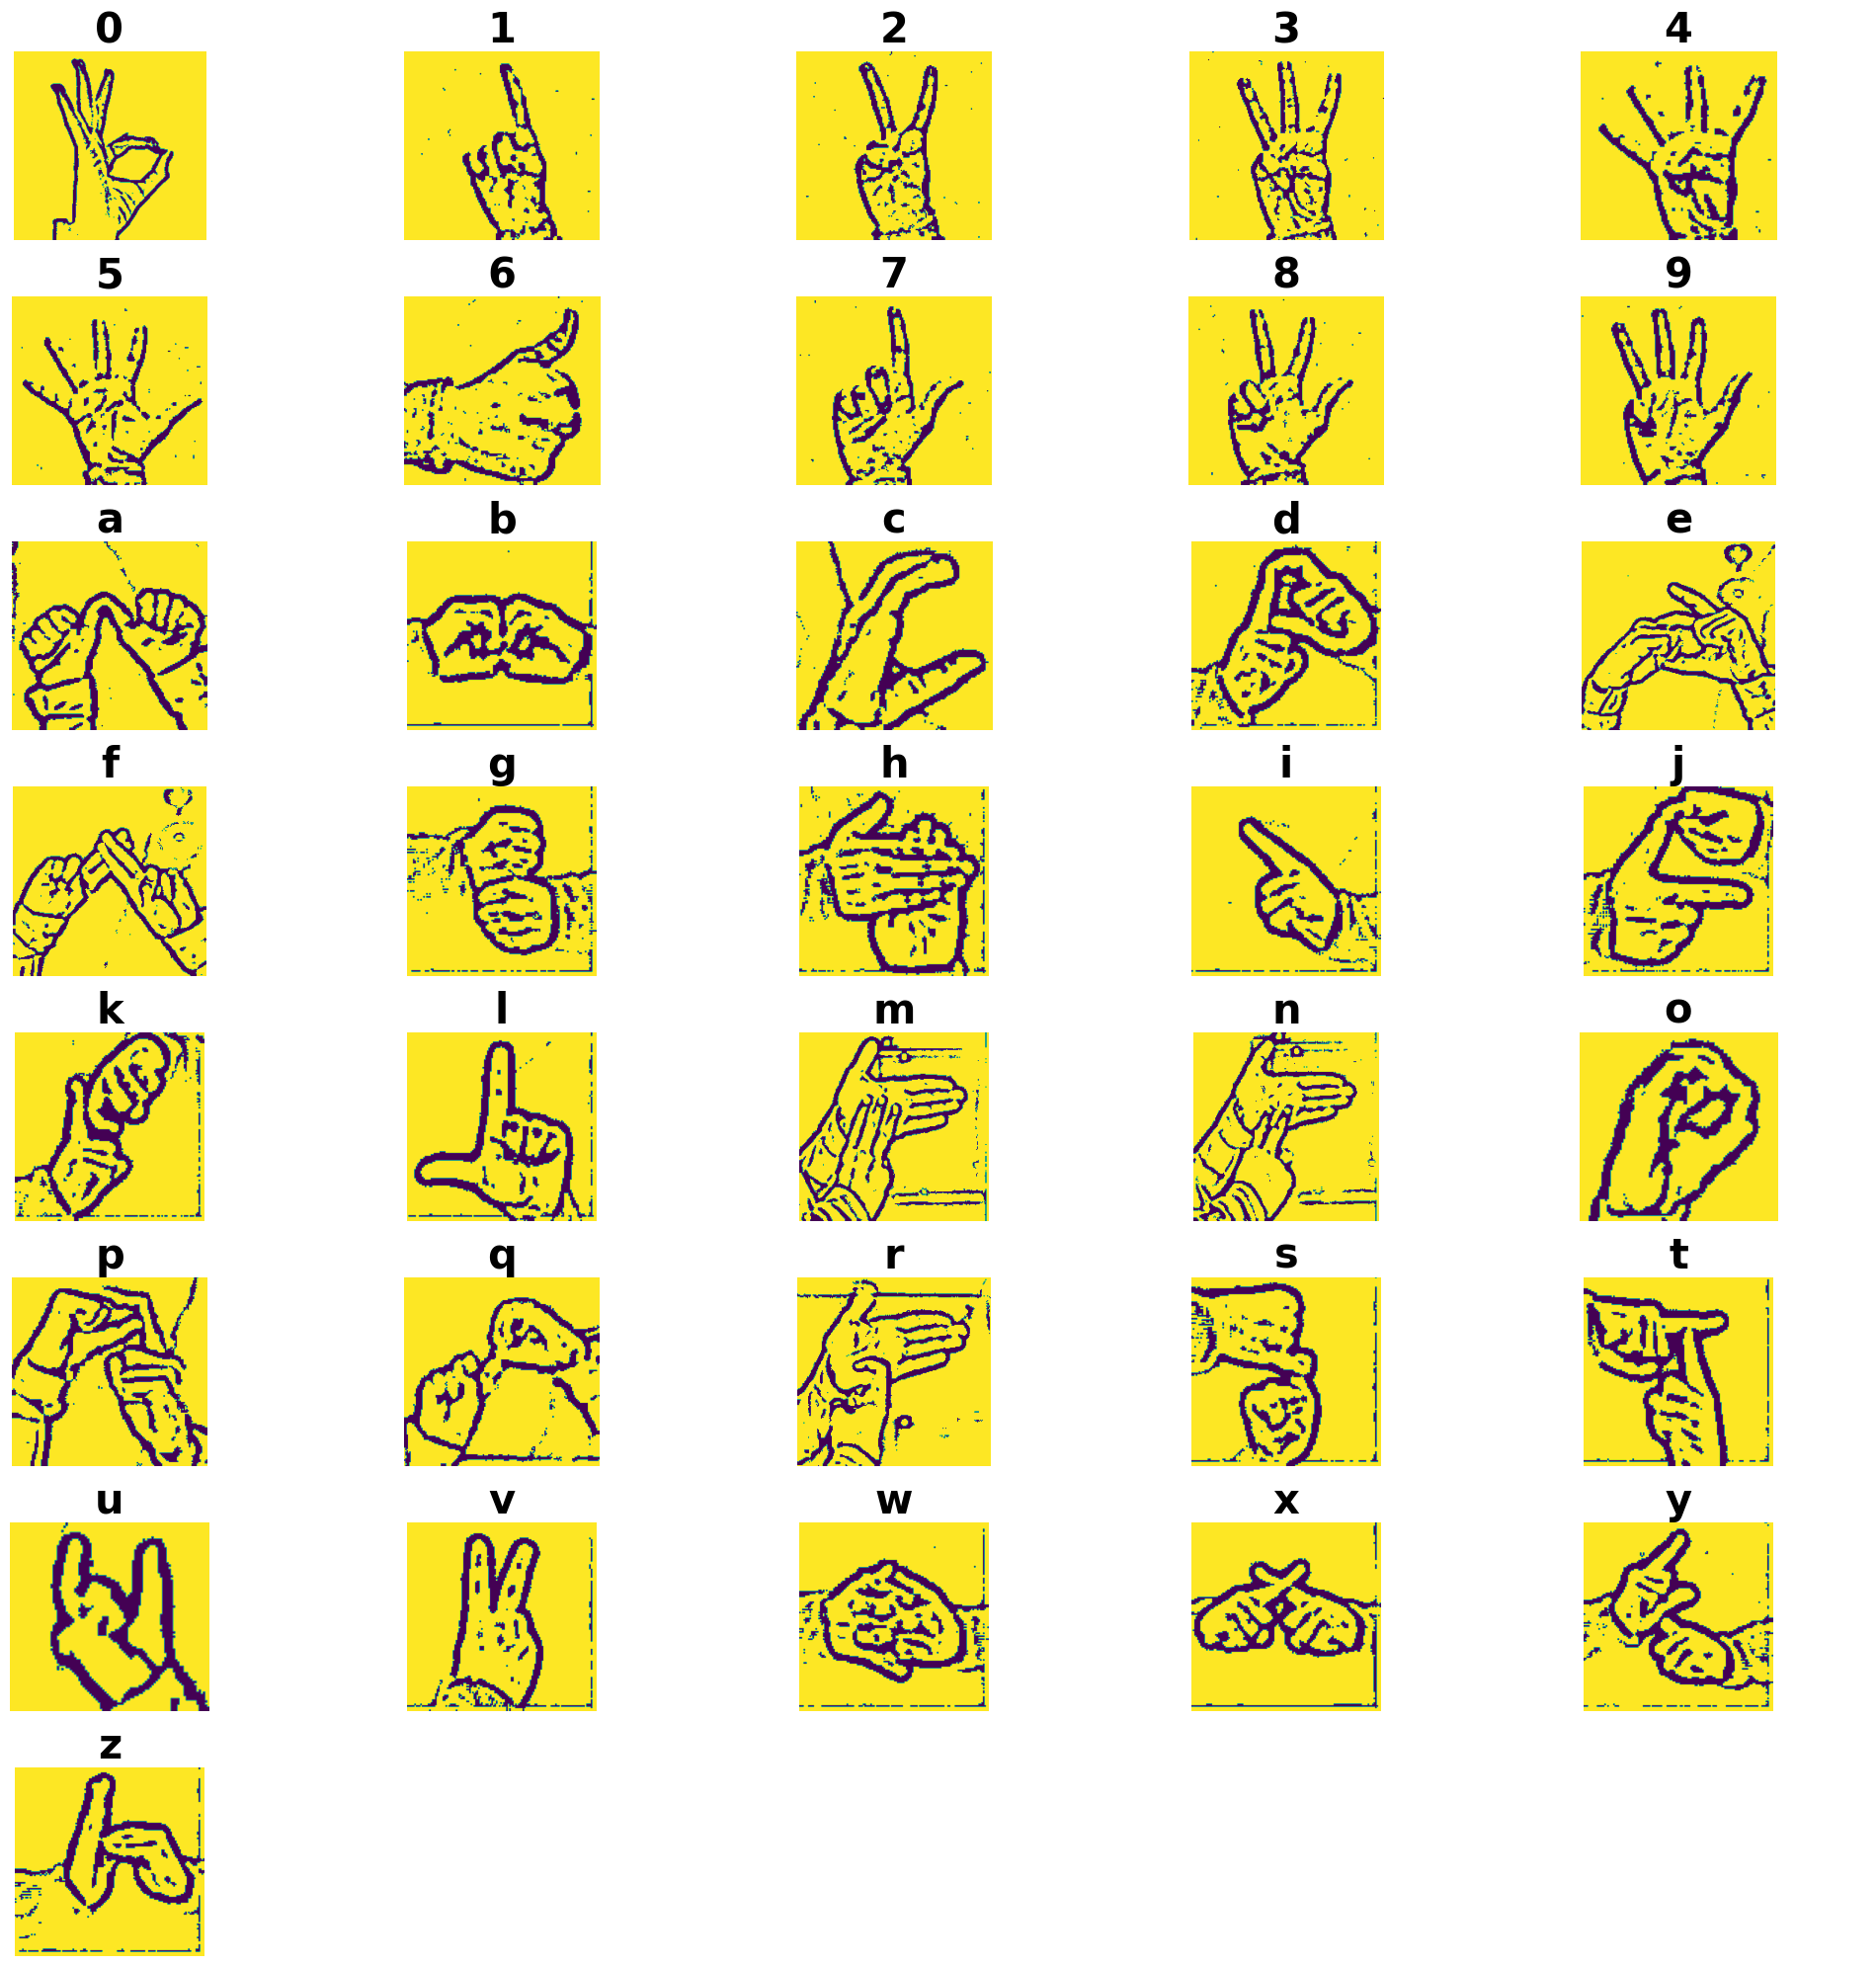

In [7]:
train_dir = train_dir

# Get the list of labels (subdirectories in the train directory)
labels = sorted(os.listdir(train_dir))

# Set up the plot
fig, axes = plt.subplots(nrows=len(labels)//5 + 1, ncols=5, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each label and plot one image per label
for ax, label in zip(axes, labels):
    # Get the path to the label directory
    label_dir = os.path.join(train_dir, label)

    # Get the list of image files in the label directory
    image_files = os.listdir(label_dir)

    # Select the first image file
    image_path = label_dir + '/' + image_files[0]

    # Load and plot the image
    image = mpimg.imread(image_path)
    ax.imshow(image)
    ax.set_title(label,fontsize=30,fontweight='bold')
    ax.axis('off')

# Hide any remaining empty subplots
for ax in axes[len(labels):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Add custom layers on top of the base model
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
# predictions = Dense(28, activation='softmax')(x)  # 28 classes for the dataset

# # Create the final model
# model = Model(inputs=base_model.input, outputs=predictions)

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
# model.summary()

In [ ]:
# train_dir = train_dir

# train_datagen = ImageDataGenerator()

# batch_size = 32

# train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='sparse')

# history = model.fit(train_generator, epochs=5)

Found 19483 images belonging to 36 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


609/609 ━━━━━━━━━━━━━━━━━━━━ 193s 242ms/step - accuracy: 0.0146 - loss: nan
Epoch 2/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 165s 213ms/step - accuracy: 0.0100 - loss: nan
Epoch 3/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 130s 213ms/step - accuracy: 0.0127 - loss: nan
Epoch 4/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 130s 212ms/step - accuracy: 0.0138 - loss: nan
Epoch 5/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 130s 212ms/step - accuracy: 0.0118 - loss: nan


In [ ]:
# test_dir = os.path.join(base_dir, "test")
# test_datagen = ImageDataGenerator()

# # Set batch size
# batch_size = 32

# # Create the test data generator
# test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='sparse')

# # Evaluate the model on the test data
# loss, accuracy = model.evaluate(test_generator)

# print("Test loss:", loss)
# print("Test accuracy:", accuracy)

Found 4872 images belonging to 36 classes.
153/153 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.0118 - loss: nan
Test loss: nan
Test accuracy: 0.012315270490944386


In [ ]:
# train_loss, train_accu = model.evaluate(train_generator)
# test_loss, test_accu = model.evaluate(test_generator)
# print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

609/609 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.0125 - loss: nan
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.0115 - loss: nan
final train accuracy = 1.23 , validation accuracy = 1.23


In [ ]:
# model.save("Resnet_model_version_2.h5")

In [8]:
# Load the ResNet50V2 model with pre-trained ImageNet weights, excluding the top classification layers
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pre-trained weights during initial training
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add a global average pooling layer to reduce dimensionality
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(36, activation='softmax')(x)  # 36 classes for the dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Sparse Categorical Crossentropy for integer labels
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Display model architecture
model.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 25,699,876 (98.04 MB)

 Trainable params: 2,135,076 (8.14 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

Found 15587 images belonging to 36 classes.
Found 3896 images belonging to 36 classes.
Found 4872 images belonging to 36 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


487/487 ━━━━━━━━━━━━━━━━━━━━ 264s 507ms/step - accuracy: 0.6705 - loss: 1.4897 - val_accuracy: 0.9494 - val_loss: 0.2298
Epoch 2/30
  1/487 ━━━━━━━━━━━━━━━━━━━━ 45s 93ms/step - accuracy: 0.9688 - loss: 0.2134

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


487/487 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9688 - loss: 0.2134 - val_accuracy: 1.0000 - val_loss: 0.1486
Epoch 3/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 238s 484ms/step - accuracy: 0.9654 - loss: 0.1738 - val_accuracy: 0.9768 - val_loss: 0.1184
Epoch 4/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 1.0000 - loss: 0.1392 - val_accuracy: 1.0000 - val_loss: 0.0388
Epoch 5/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 257s 484ms/step - accuracy: 0.9802 - loss: 0.0976 - val_accuracy: 0.9822 - val_loss: 0.0813
Epoch 6/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 1.0000 - loss: 0.0535 - val_accuracy: 1.0000 - val_loss: 0.0708
Epoch 7/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 258s 479ms/step - accuracy: 0.9812 - loss: 0.0761 - val_accuracy: 0.9819 - val_loss: 0.0660
Epoch 8/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 1.0000 - loss: 0.0478 - val_accuracy: 0.9583 - val_loss: 0.0509
Epoch 9/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 264s 484ms/step - accuracy: 0.9870 - loss: 0.0550 - val_a

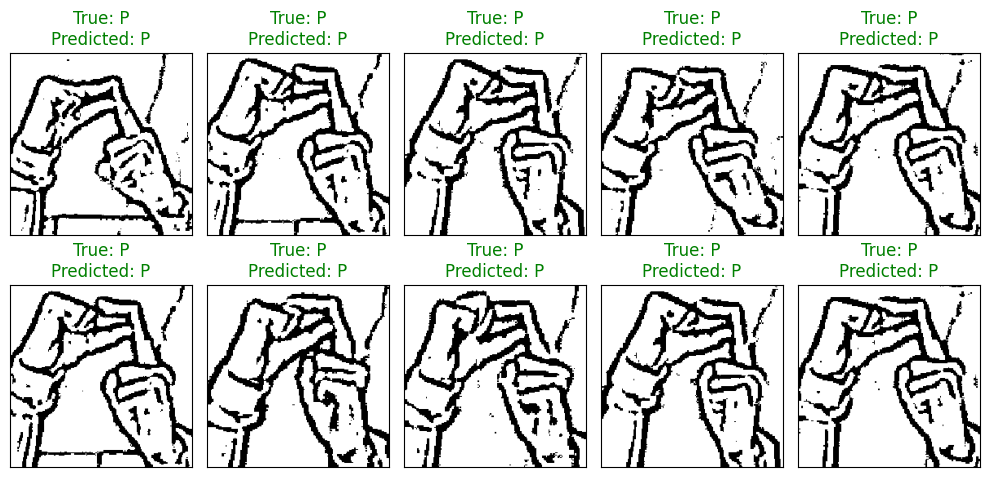

In [12]:
batch_size = 32
image_size = (224, 224)

# Data generators with rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Test data only needs rescaling

# Training and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, checkpoint]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


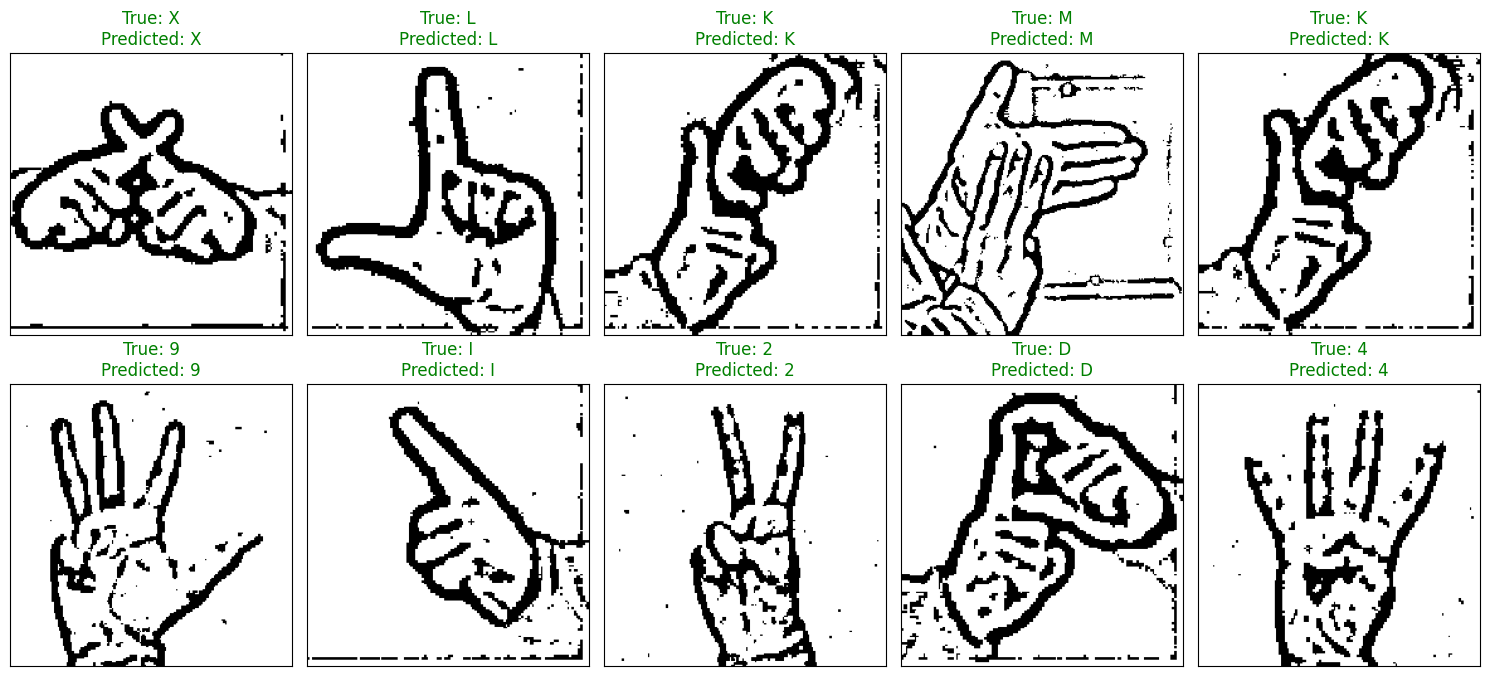

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Labels for each class
labels = [str(i) for i in range(10)] + [chr(i) for i in range(65, 91)]  # Digits 0-9 and A-Z

# Set up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7), subplot_kw={'xticks': [], 'yticks': []})

# Choose 10 random indices from the entire test data
total_images = len(test_generator.filenames)  # Total number of images in the dataset
random_indices = np.random.choice(total_images, 10, replace=False)

for i, ax in enumerate(axes.flat):
    # Get the index of the random image
    random_index = random_indices[i]

    # Get the image and label from the test generator based on the random index
    # To find the corresponding batch and image index, we use the total image count and batch size
    batch_index = random_index // batch_size  # Integer division to find which batch
    image_index = random_index % batch_size  # Modulo to find the image index in the batch

    # Fetch the image and label from the batch
    Random_Img = test_generator[batch_index][0][image_index]
    Random_Img_Label = int(test_generator[batch_index][1][image_index])  # Ensure label is an integer

    # Make a prediction using the model
    prediction = model.predict(tf.expand_dims(Random_Img, axis=0), verbose=0)
    Model_Prediction = int(np.argmax(prediction, axis=1)[0])

    # Plot the image
    ax.imshow(Random_Img.squeeze(), cmap='gray')  # Assuming grayscale images; adjust if RGB

    # Set title with true and predicted labels, colored based on correctness
    color = "green" if Random_Img_Label == Model_Prediction else "red"
    ax.set_title(f"True: {labels[Random_Img_Label]}\nPredicted: {labels[Model_Prediction]}", color=color)

plt.tight_layout()
plt.show()
